# Merged data analysis

Importing necessary libraries:

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats

## Setting up directories

In [7]:
compression_file = './Summary_Results_Mech_Testing.csv'
raman_file = './Output_data_aggregated_Raman.csv'

## Merging the Raman and compressions outputs

In [29]:
df_raman = pd.read_csv(raman_file,sep=",").reset_index(drop=True)
df_compression = pd.read_csv(compression_file,sep=";")
df_compression['Sample_ID'] = df_compression['Sample_ID'].str[-1].astype(int) # taking the last number as sample ID


merged_df = pd.merge(df_compression, df_raman, on='Sample_ID')
merged_df.head()

,Sample_ID,Diameter_mm,Initial_Length_mm,Ultimate_Force_N,Ultimate_Stress_MPa,Max_Stiffness_Nmm,Apparent_Youngs_Modulus_MPa,M2M_ratio_Mean,M2M_ratio_SD
0,1,15.0,15.0,-8970.39,-50.73,13504.59,1146.31,1.672062,0.132250
1,2,14.8,15.2,-8970.39,-52.11,13504.59,1193.20,1.455636,0.126079
2,3,15.1,14.9,-8970.39,-50.06,13504.59,1123.63,0.868683,0.301216
3,4,15.2,14.7,-8970.39,-49.40,13504.59,1094.01,1.125734,0.228606


## Visualizing the correlations

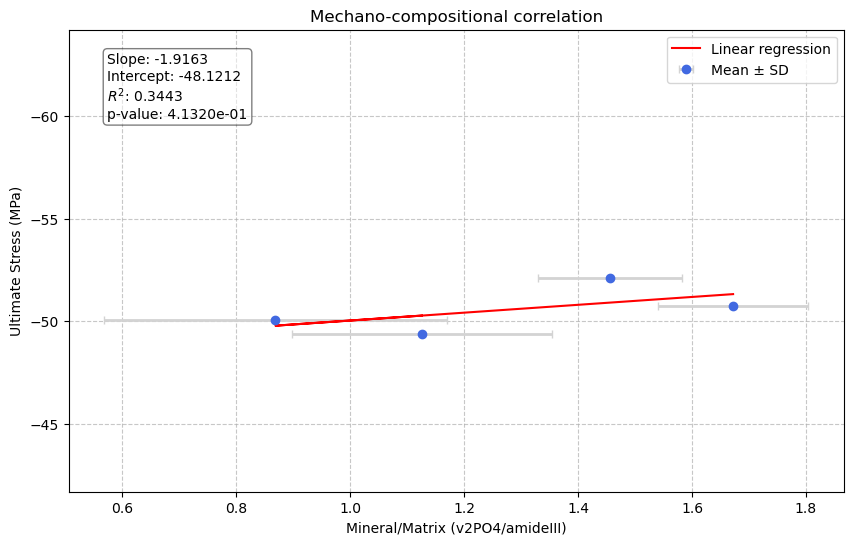

In [30]:
x = merged_df['M2M_ratio_Mean']
y = merged_df['Ultimate_Stress_MPa']
x_err = merged_df['M2M_ratio_SD']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept


plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, fmt='o', color='royalblue', 
             ecolor='lightgray', elinewidth=2, capsize=3, label='Mean ± SD')
line = slope * x + intercept
plt.plot(x, line, color='red', label='Linear regression')

stats_text = (
    f'Slope: {slope:.4f}\n'
    f'Intercept: {intercept:.4f}\n'
    f'$R^2$: {r_value**2:.4f}\n'
    f'p-value: {p_value:.4e}'
)
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.xlabel('Mineral/Matrix (v2PO4/amideIII)')
plt.ylabel('Ultimate Stress (MPa)')
plt.title('Mechano-compositional correlation')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.8*min(y),1.3*max(y)) # set y axis boundaries

plt.savefig('./CompressionRaman_correlation.png', bbox_inches="tight", dpi = 600, format='png')
# plt.show()